In [2]:
#Correr solo si se va a plotear spectrogramas

import librosa

def plot_spectrogram(specgram, title=None, ylabel="freq_bin", ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    if title is not None:
        ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", interpolation="nearest")

In [3]:
import os
import pandas as pd
from torch import nn
from torch.utils.data import DataLoader
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchsummary import summary



In [4]:
#librerias locales
#from ..libs import dataLoaders as mi_dataLoader
#from ..libs import clasificador_padre as mi_clasificador
from importlib.machinery import SourceFileLoader
mi_dataLoader = SourceFileLoader('dataLoadersV2', '../libs/dataLoadersV2.py').load_module()
mi_clasificador = SourceFileLoader('clasificador_padre', '../libs/clasificador_padre.py').load_module()

# Cargando un DataSet

In [25]:
dataSetName = 'onlywoman'
root = './'
while not os.path.isdir(f'{root}data'):
    root += '../'
Path_train = root+'data/'+dataSetName+'_train.csv'
Path_val = root+'data/'+dataSetName+'_val.csv'
Path_test = root+'data/'+dataSetName+'_test.csv'

In [26]:
#cargo el data set
testDf = pd.read_csv(Path_train)
testDataSet = mi_dataLoader.clasification_dataset(testDf, file_col="fileMfcc", target_col="artist", seed = 98)
#una muestra del data set
sample, target = testDataSet[0:9]
print(sample[0].shape, target)

 29%|██▉       | 2536/8799 [02:00<05:28, 19.05it/s]

# Generando el DataLoader

In [10]:

#def collate_fn(batch):
#    _mels = torch.stack([item[0] for item in batch], dim = 0)
#    _targets = torch.stack([torch.tensor(item[1]) for item in batch], dim=0)
#    return _mels, _targets

test_dataloader = DataLoader(testDataSet, batch_size=100, shuffle=True)
muestra_data, muestra_target = next(iter(test_dataloader))
muestra_target

tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0

Feature batch shape: torch.Size([100, 13, 997])
Labels batch shape: torch.Size([100, 3])


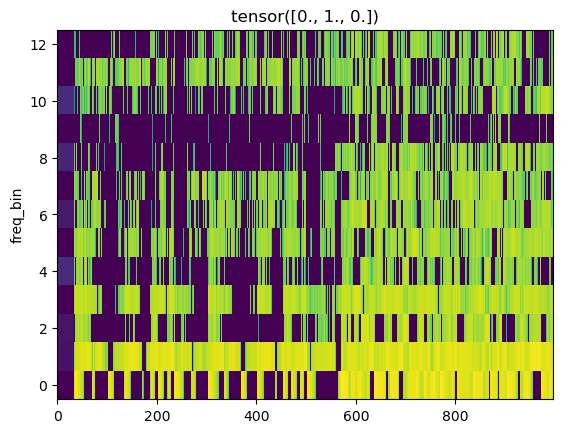

In [14]:
# Display image and label.
train_features, train_labels = next(iter(test_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
plot_spectrogram(train_features[0], train_labels[0])
#img = train_features[0].squeeze()
#label = train_labels[0]
#plt.imshow(img, cmap="gray")
#plt.show()
#print(f"Label: {label}")

# instanciando un modelo

In [15]:
history = []

In [21]:

clasificador = mi_clasificador.onlyWoman_MFCC_02(list(testDataSet.dictionary.keys()))
s = 0
#clasificador.architecture

In [22]:
def test_accur (prediccion, target_batch):
    return(torch.argmax(target_batch, axis=1) == torch.argmax(prediccion, axis=1)).sum().item() / len(target_batch)

In [23]:
    test_optimizer = torch.optim.Adam(clasificador.parameters(), lr=0.001)
    test_criterion = torch.nn.CrossEntropyLoss()

In [37]:
clasificador.modules

<bound method Module.modules of onlyWoman_MFCC_02(
  (inPut): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
  )
  (chanelUp): Sequential(
    (0): Conv2d(4, 16, kernel_size=(1, 7), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(1, 7), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(1, 7), stride=(1, 2))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (justTime): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 7), stride=(1, 2))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 7), stride=(1, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (out): Sequential(
    (0): Linear(in_features=19712, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
    (2): Linear(in_features=500, out_features=100, bias=True)


In [24]:
for i in range(5):
    loss_log, acur_log = clasificador.train_loop(1, test_dataloader, test_optimizer , test_criterion, test_accur)
    save_state = clasificador.state_dict()
    torch.save(save_state, f"{root}modelos/temp/ow_2_1_{i+1}.pt")
    #mi_clasificador.save_model(clasificador,f"{root}modelos/temp/saveState_{i}.pt")
    history.append((loss_log, acur_log))

100%|██████████| 88/88 [51:31<00:00, 35.13s/it]


Epoch 0 of 1 / Loss: 0.851733386516571 / Accuracy: 0.6971235275268555


  9%|▉         | 8/88 [04:54<55:48, 41.86s/it]

In [25]:
torch.save(history, f"{root}modelos/temp/history_ow_1+.pt")


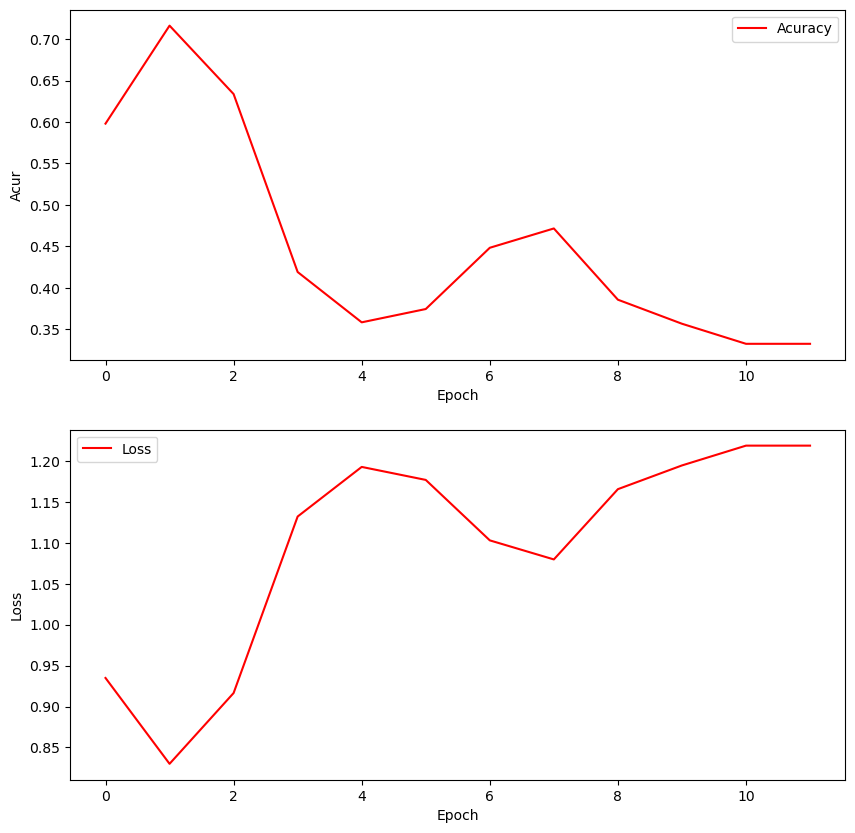

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (10,10))
_ = torch.Tensor(history)
_.T
# Graficar en el primer subplot
axes[0].plot(range(len(_.T[1])), _.T[1], 'r-', label='Acuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Acur')
axes[0].legend()

axes[1].plot(range(len(_.T[0])), _.T[0], 'r-', label='Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Validando

In [56]:
#Carga de las muestras y el DataLoader
#Path_val = './csv/validation_set.csv'
valDf = pd.read_csv(Path_val)
valDataSet = mi_dataLoader.clasification_dataset(valDf, file_col="fileMfcc", target_col="artist", seed = 98)
val_dataloader = DataLoader(valDataSet, batch_size=100, shuffle=False)


100%|██████████| 2640/2640 [00:09<00:00, 292.82it/s]


In [50]:
# Cargo el modelo
save_state = torch.load(root+"/modelos/temp/ow_2_1.pt")
clasificador = mi_clasificador.onlyWoman_MFCC_02(list(valDataSet.dictionary.keys()))
clasificador.load_state_dict(save_state)

C:\Users\Alenca\AppData\Local\Temp\ipykernel_14972\4271990974.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  save_state = torch.load(root+"/modelos/temp/ow_2_1.pt")


<All keys matched successfully>

In [57]:
#Separando las muestras y los targets
muestras = []
targets = []
for muestra_data, muestra_target in tqdm(val_dataloader):
    muestras.append(muestra_data)
    targets.append(torch.tensor(muestra_target))
muestras[0].shape

  0%|          | 0/27 [00:00<?, ?it/s]C:\Users\Alenca\AppData\Local\Temp\ipykernel_14972\2362296138.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets.append(torch.tensor(muestra_target))
100%|██████████| 27/27 [00:00<00:00, 45.22it/s]


torch.Size([100, 13, 997])

In [58]:
def acuracy_fn (prediccion, target_batch):
    return(torch.argmax(target_batch, axis=1) == torch.argmax(prediccion, axis=1)).sum().item() / len(target_batch)

loss_fn = torch.nn.CrossEntropyLoss()

In [59]:
resultado_evalucion = clasificador.evaluate(val_dataloader, loss_fn, acuracy_fn)

In [60]:
resultado_evalucion #ow_2_1+1.pt

(0.8670865407696476, 0.6807407407407408)

In [ ]:
resultado_evalucion #ow_2_1.pt

(0.8670865407696476, 0.6807407407407408)

In [ ]:
resultado_evalucion #valid_despues de entrenar

(0.7698707757172761, 0.7809259259259259)

## Codigo usado mientras se generaba la arquitectura (osea, codigo desechable)

In [ ]:
mi_clasificador = SourceFileLoader('clasificador_padre', '../libs/clasificador_padre.py').load_module()

In [24]:
muestra_data, muestra_target = next(iter(test_dataloader))
#muestra = torch.stack(muestra, 0)
muestra_data.shape

torch.Size([100, 13, 997])

In [59]:
mi_clasificador = SourceFileLoader('clasificador_padre', '../libs/clasificador_padre.py').load_module()
clasificador = mi_clasificador.onlyWoman_MFCC_01(list(testDataSet.dictionary.keys()))

In [60]:
res =clasificador(muestra_data)
res.shape

In: torch.Size([100, 13, 997])
squeeze: torch.Size([100, 1, 13, 997])
Shape post 1D:  torch.Size([100, 4, 15, 999])
post flatten: torch.Size([100, 136136])
Alive


torch.Size([100, 3])

In [45]:
out = nn.Sequential(   # bloque que acondiciona la salida
    nn.Linear(*self.architecture[-1]), #Lineal que sale a las clases objetivo
    nn.Softmax( dim = 1))

NameError: name 'self' is not defined

In [61]:
test_criterion(res,muestra_target)

tensor(1.1800, grad_fn=<DivBackward1>)

In [62]:
test_accur (res, muestra_target)

0.3

In [64]:
#importlib.reload(mi_clasificador)
clasificador = mi_clasificador.Clasificador_01(testDataSet.dictionary.keys())
res =clasificador(muestra_data)
test_accur (res, muestra_target)


TypeError: _Clasificador_padre.__init__() missing 1 required positional argument: 'classes'

In [318]:
(torch.argmax(muestra_target, axis = 1) == torch.argmax(res, axis=1)).sum().item() / len(muestra_target)

0.0

In [319]:
torch.argmax(muestra_target, axis = 1) == torch.argmax(res, axis=1)

tensor([False])

In [42]:
muestra_target.shape, res.shape

(torch.Size([3, 3]), torch.Size([3, 3]))

In [43]:
torch.argmax(res, axis = 1)

tensor([0, 2, 2])

In [44]:
res

tensor([[9.9844e-01, 2.4358e-21, 1.5574e-03],
        [1.7411e-05, 4.4522e-07, 9.9998e-01],
        [0.0000e+00, 0.0000e+00, 1.0000e+00]], grad_fn=<SoftmaxBackward0>)

In [43]:
torch.argmax(muestra_target, axis=1)

tensor([0, 0, 0, 0, 0])

In [44]:
muestra_target

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [21]:
muestra_target == res

tensor([[False,  True, False],
        [False,  True, False],
        [False, False, False],
        [False,  True, False],
        [False, False, False]])

In [45]:
res

tensor([[0.0000e+00, 4.1355e-15, 1.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0000e+00],
        [0.0000e+00, 1.0000e+00, 4.7325e-08],
        [0.0000e+00, 1.0000e+00, 4.9665e-37],
        [1.1335e-33, 3.0150e-14, 1.0000e+00]], grad_fn=<SoftmaxBackward0>)

In [ ]:
flat = nn.Flatten(start_dim = 0)
lin = nn.Linear(17920,3)
soft = nn.Softmax(dim = 0)

print("Red: ",res.shape)
aux = flat(res)
print("Flat: ",aux.shape)
aux = lin(aux)
print("Line: ",aux.shape)
aux = soft(aux)
print("Soft:",aux.shape)

Red:  torch.Size([128, 5, 28])
Flat:  torch.Size([17920])
Line:  torch.Size([3])
Soft: torch.Size([3])
